<a href="https://colab.research.google.com/github/anmol0720/Airport/blob/master/Airport_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import networkx as nx

In [0]:
from pandas import read_csv

In [0]:
columns= ['Airline', 'Airline ID', 'Source airport', 'Source airport ID', 'Destination airport','Destination airport ID', 'Codeshare', 'Stops', 'Equipment']
routes=read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat',header=None)
routes.columns=columns

In [0]:
columns= ['ID', 'Name', 'City', 'Country', 'IATA', 'VIDP', 'Lat', 'Long', 'Elevation', 'Timezone', 'DST','Timezone Olson Format', 'type', 'Source']
airports=read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat',header=None)
airports.columns=columns

In [0]:
edge=[(row['Source airport'],row['Destination airport']) for item,row in routes[['Source airport','Destination airport']].iterrows()]

In [0]:
route_graph=nx.Graph()
route_graph.add_edges_from(edge)

In [0]:
import matplotlib.pyplot as plt

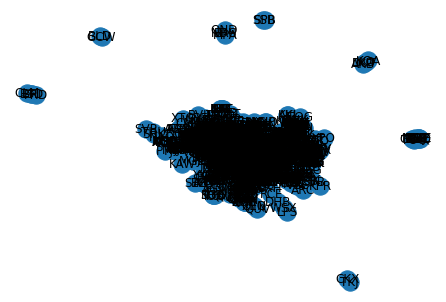

In [8]:
nx.draw(route_graph, with_labels = True) 

In [0]:
origin='IXD'
source='IXD'
destination='CGN'

In [0]:
import math
def cal_flight_distance(origin,destination):
  radius=6371
  lat1,lon1=origin
  lat2,lon2=destination
  
  dlat=math.radians(lat2-lat1)
  dlon=math.radians(lon2-lon1)
  a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1))*math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
  c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
  d= radius*c
  return(d)

In [0]:
def find_all_shortest_paths(graph,source,destination):
  return list(p for p in nx.all_shortest_paths(graph, source=source, target=destination,))

In [0]:
def get_all_shortest_path_airportname(route_graph,airports,origin,destination):
  airports=airports.set_index('IATA')
  entries=[]
  for path in find_all_shortest_paths(route_graph,source,destination):
    entries.append([dict(airports.loc[item])['City'] for item in path])
  return(entries)

In [13]:
entrie=get_all_shortest_path_airportname(route_graph,airports,'IXD','CGN')
print(entrie)

[['Allahabad', 'Mumbai', 'London', 'Cologne'], ['Allahabad', 'Delhi', 'London', 'Cologne'], ['Allahabad', 'Mumbai', 'Istanbul', 'Cologne'], ['Allahabad', 'Delhi', 'Istanbul', 'Cologne'], ['Allahabad', 'Mumbai', 'Munich', 'Cologne'], ['Allahabad', 'Delhi', 'Munich', 'Cologne'], ['Allahabad', 'Mumbai', 'Zurich', 'Cologne'], ['Allahabad', 'Delhi', 'Zurich', 'Cologne'], ['Allahabad', 'Mumbai', 'Amsterdam', 'Cologne'], ['Allahabad', 'Delhi', 'Amsterdam', 'Cologne'], ['Allahabad', 'Mumbai', 'Tehran', 'Cologne'], ['Allahabad', 'Delhi', 'Tehran', 'Cologne'], ['Allahabad', 'Mumbai', 'Tel-aviv', 'Cologne'], ['Allahabad', 'Delhi', 'Birmingham', 'Cologne'], ['Allahabad', 'Delhi', 'Vienna', 'Cologne'], ['Allahabad', 'Delhi', 'Rome', 'Cologne']]


In [0]:
def get_all_shortest_paths_IATA(route_graph, airports, source, destination):
  airports= airports.set_index('IATA')
  entries2=find_all_shortest_paths(route_graph, source, destination)    
  return entries2

In [15]:
entrie2=get_all_shortest_paths_IATA(route_graph,airports,'IXD','CGN')
print(entrie2)

[['IXD', 'BOM', 'LHR', 'CGN'], ['IXD', 'DEL', 'LHR', 'CGN'], ['IXD', 'BOM', 'IST', 'CGN'], ['IXD', 'DEL', 'IST', 'CGN'], ['IXD', 'BOM', 'MUC', 'CGN'], ['IXD', 'DEL', 'MUC', 'CGN'], ['IXD', 'BOM', 'ZRH', 'CGN'], ['IXD', 'DEL', 'ZRH', 'CGN'], ['IXD', 'BOM', 'AMS', 'CGN'], ['IXD', 'DEL', 'AMS', 'CGN'], ['IXD', 'BOM', 'IKA', 'CGN'], ['IXD', 'DEL', 'IKA', 'CGN'], ['IXD', 'BOM', 'TLV', 'CGN'], ['IXD', 'DEL', 'BHX', 'CGN'], ['IXD', 'DEL', 'VIE', 'CGN'], ['IXD', 'DEL', 'FCO', 'CGN']]


In [16]:
airports[airports['City']== 'Delhi']

,ID,Name,City,Country,IATA,VIDP,Lat,Long,Elevation,Timezone,DST,Timezone Olson Format,type,Source
2929,3091,Safdarjung Airport,Delhi,India,\N,VIDD,28.584499,77.205803,705,5.5,N,Asia/Calcutta,airport,OurAirports
2931,3093,Indira Gandhi International Airport,Delhi,India,DEL,VIDP,28.566500,77.103104,777,5.5,N,Asia/Calcutta,airport,OurAirports


In [17]:
cal_flight_distance((48.969398, 2.441390), (19.088699, 72.867897))

7001.412511633502

In [0]:
airport2=airports.copy()
airport2=airports.set_index('IATA')
dist=[]
for item in entrie2:
  a=0.0
  for k in range(len(item)-1):
    a=a+cal_flight_distance((dict(airport2.loc[item[k]])['Lat'],dict(airport2.loc[item[k]])['Long']),(dict(airport2.loc[item[k+1]])['Lat'],dict(airport2.loc[item[k+1]])['Long']))
  dist.append(a)

In [0]:
print(dist)

[8900.366362479026, 7841.0257813618655, 7955.369782859516, 7108.12350191321, 7900.977534194643, 6910.668486378316, 8084.509904467434, 7115.117826067042, 8242.260030513204, 7168.6131322551955, 7840.968852149706, 7018.4885588787865, 8287.832455655687, 8012.062919352277, 6867.514086980334, 7589.218040116257]


In [19]:
c=0
k1=0
for k in range(len(dist)-1):
  if(dist[k]<=dist[k+1]):
    c=dist[k]
    k1=k
print("Shortest Path Distance=",c)
print(k1)

Shortest Path Distance= 6867.514086980334
14


In [20]:
print("The Shortest Path Goes Throught these Airports:")
print(entrie[k1])

The Shortest Path Goes Throught these Airports:
['Allahabad', 'Delhi', 'Vienna', 'Cologne']


In [0]:
avg_speed=800 #considered
time=[]
t=0
for k in range(len(dist)-1):
  t=(dist[k]/avg_speed)+(3*0.40);   #Taking Landing+Takeoff time as 40 min approx. 
  time.append(t)

In [22]:
time

[12.325457953098784,
 11.001282226702333,
 11.144212228574396,
 10.085154377391511,
 11.076221917743304,
 9.838335607972894,
 11.305637380584294,
 10.093897282583804,
 11.502825038141506,
 10.160766415318996,
 11.001211065187132,
 9.973110698598482,
 11.55979056956961,
 11.215078649190346,
 9.784392608725415]

(A)
Find the degrees of each of the nodes using the function in NetworkX. Plot a graph of histogram of distribution of degrees. Plot a graph of Degrees (K) versus Degree of N(K) for all of the data points.

In [23]:
#Degree of each node
route_graph.degree()

DegreeView({'AER': 18, 'KZN': 21, 'ASF': 7, 'MRV': 16, 'CEK': 14, 'OVB': 53, 'DME': 190, 'NBC': 7, 'TGK': 1, 'UUA': 3, 'EGO': 9, 'KGD': 10, 'GYD': 39, 'LED': 113, 'SVX': 67, 'NJC': 9, 'NUX': 10, 'BTK': 4, 'IKT': 28, 'HTA': 9, 'KCK': 1, 'ODO': 1, 'UKX': 1, 'ULK': 2, 'YKS': 23, 'MJZ': 6, 'AYP': 1, 'LIM': 57, 'CUZ': 5, 'PEM': 2, 'HUU': 1, 'IQT': 4, 'PCL': 3, 'TPP': 3, 'ABJ': 21, 'BOY': 2, 'OUA': 15, 'ACC': 30, 'BKO': 16, 'DKR': 32, 'COO': 20, 'LFW': 16, 'NIM': 9, 'BOG': 74, 'GYE': 19, 'UIO': 26, 'CLO': 18, 'SCY': 1, 'OCC': 2, 'BDS': 19, 'ZRH': 137, 'BOD': 49, 'BRS': 73, 'GVA': 101, 'LPA': 83, 'LCA': 55, 'RMF': 4, 'TFS': 85, 'AJR': 1, 'LYC': 2, 'ARN': 124, 'GEV': 4, 'HAD': 4, 'JKG': 2, 'KRF': 2, 'KSD': 2, 'MHQ': 3, 'OER': 1, 'POR': 3, 'TRF': 30, 'VBY': 4, 'VHM': 2, 'VXO': 6, 'HMV': 1, 'KOK': 2, 'TKU': 7, 'OSL': 105, 'ADQ': 8, 'AOS': 2, 'KKB': 2, 'KLN': 2, 'KOZ': 2, 'OLH': 1, 'KZB': 1, 'SYB': 2, 'KYK': 1, 'ORI': 2, 'KPR': 1, 'BSO': 1, 'MNL': 78, 'BXU': 2, 'CBO': 1, 'CGY': 5, 'CRM': 1, 'DGT'

In [0]:
K=[route_graph.degree(n) for n in route_graph.nodes()]

In [0]:
K=sorted(K)

Text(0, 0.5, 'N(K)')

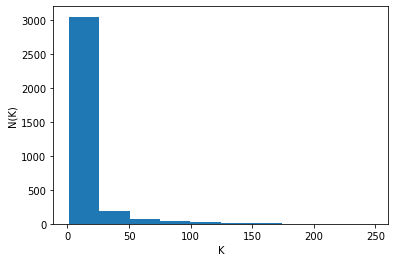

In [26]:
plt.hist(K)
plt.xlabel('K')
plt.ylabel('N(K)')

B) Plot the graph of K versus N(K)/N where N is total number of nodes/ data points

In [27]:
#Total of Nodes in the route_graph formed
N=route_graph.__len__()
N

3425

In [0]:
import collections
from collections import Counter

In [0]:
counts = Counter(d for n, d in route_graph.degree())
counts
li=list()
a=0
for i in range(len(counts)+ 1):
    a=counts.get(i, 0)
    li.append(a)

In [0]:
NN=[]
c=0.0
for n in range(len(counts)+1):
    c=li[n]/N
    NN.append(c)

In [0]:
K_unique=set(K)
K_l=list(K_unique)
K_list=[]
for t in range(len(K_l)+1):
    K_list.append(t)

Text(0, 0.5, 'N(K)/N')

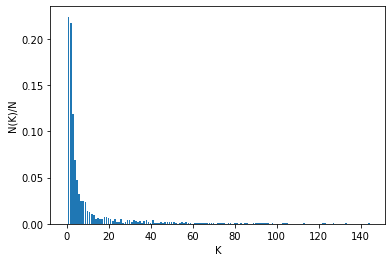

In [32]:
plt.bar(K_list,NN)
plt.xlabel('K')
plt.ylabel('N(K)/N')

C) Plot the graph of log(K) versus N(K)/N

In [0]:
import math
from math import log

In [0]:
log_K=[]
l=0.0
for i in range(len(K_list)): 
    l=math.log(K_list[i]+1)   #Normalising by adding 1 as we cannot find log(0)
    log_K.append(l)

Text(0, 0.5, 'N(K)/N')

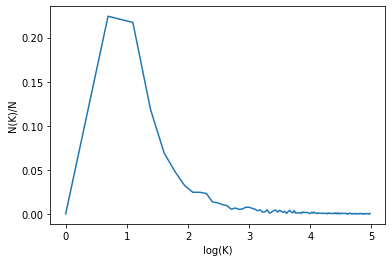

In [35]:
plt.plot(log_K,NN)
plt.xlabel('log(K)')
plt.ylabel('N(K)/N')

D) Plot the graph of K versus log(N(K)/N)

In [0]:
log_NN=[]
nn=0.0
for i in range(len(NN)): 
    nn=math.log(NN[i]+1)   #Normalising by adding 1 as we cannot find log(0)
    log_NN.append(nn)

Text(0, 0.5, 'log(N(K)/N)')

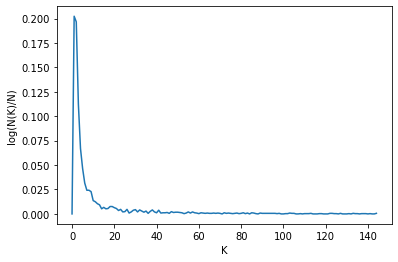

In [0]:
plt.plot(K_list,log_NN)
plt.xlabel('K')
plt.ylabel('log(N(K)/N)')

E) Plot the graph of log(K) versus log(N(K)/N)

Text(0, 0.5, 'log(N(K)/N)')

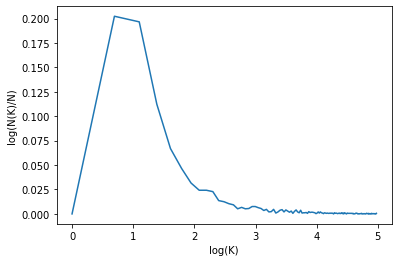

In [0]:
plt.plot(log_K,log_NN)
plt.xlabel('log(K)')
plt.ylabel('log(N(K)/N)')